In [2]:
import io
from IPython.nbformat import current
def execute_notebook(nbfile):
    with io.open(nbfile) as f:
        nb = current.read(f, 'json')
    ip = get_ipython()
    for cell in nb.worksheets[0].cells:
        if cell.cell_type != 'code':
            continue
        ip.run_cell(cell.input)
execute_notebook("/cellar/users/ramarty/Projects/kir/KIR_development/bin/imports.ipynb")
execute_notebook("/cellar/users/ramarty/Projects/kir/KIR_development/data_gathering/alternate/sample_mapping.ipynb")

Populating the interactive namespace from numpy and matplotlib
Populating the interactive namespace from numpy and matplotlib
Populating the interactive namespace from numpy and matplotlib


/cellar/users/ramarty/anaconda/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['normal']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [3]:
PATH='/cellar/users/ramarty/Data/hla_ii/clinical/expression/'
files = [PATH+x for x in os.listdir(PATH)]

In [5]:
files

['/cellar/users/ramarty/Data/hla_ii/clinical/expression/expression.3000_4000.tsv',
 '/cellar/users/ramarty/Data/hla_ii/clinical/expression/expression.9000_10000.tsv',
 '/cellar/users/ramarty/Data/hla_ii/clinical/expression/expression.8000_9000.tsv',
 '/cellar/users/ramarty/Data/hla_ii/clinical/expression/expression.5000_6000.tsv',
 '/cellar/users/ramarty/Data/hla_ii/clinical/expression/expression.1000_2000.tsv',
 '/cellar/users/ramarty/Data/hla_ii/clinical/expression/expression.6000_7000.tsv',
 '/cellar/users/ramarty/Data/hla_ii/clinical/expression/expression.4000_5000.tsv',
 '/cellar/users/ramarty/Data/hla_ii/clinical/expression/expression.2000_3000.tsv',
 '/cellar/users/ramarty/Data/hla_ii/clinical/expression/expression.7000_8000.tsv',
 '/cellar/users/ramarty/Data/hla_ii/clinical/expression/expression.0_1000.tsv']

In [8]:
tmp = pd.read_csv(f, sep='\t', index_col=0).transpose()

In [12]:
sample_genes = tmp.columns[:100]

In [13]:
all_dfs = []
for f in files:
    try:
        all_dfs.append(pd.read_csv(f, sep='\t', index_col=0).transpose()[sample_genes])
        print "done: ", f
    except:
        print f
df = pd.concat(all_dfs)

done:  /cellar/users/ramarty/Data/hla_ii/clinical/expression/expression.3000_4000.tsv
done:  /cellar/users/ramarty/Data/hla_ii/clinical/expression/expression.9000_10000.tsv
done:  /cellar/users/ramarty/Data/hla_ii/clinical/expression/expression.8000_9000.tsv
done:  /cellar/users/ramarty/Data/hla_ii/clinical/expression/expression.5000_6000.tsv
done:  /cellar/users/ramarty/Data/hla_ii/clinical/expression/expression.1000_2000.tsv
done:  /cellar/users/ramarty/Data/hla_ii/clinical/expression/expression.6000_7000.tsv
done:  /cellar/users/ramarty/Data/hla_ii/clinical/expression/expression.4000_5000.tsv
done:  /cellar/users/ramarty/Data/hla_ii/clinical/expression/expression.2000_3000.tsv
done:  /cellar/users/ramarty/Data/hla_ii/clinical/expression/expression.7000_8000.tsv
done:  /cellar/users/ramarty/Data/hla_ii/clinical/expression/expression.0_1000.tsv


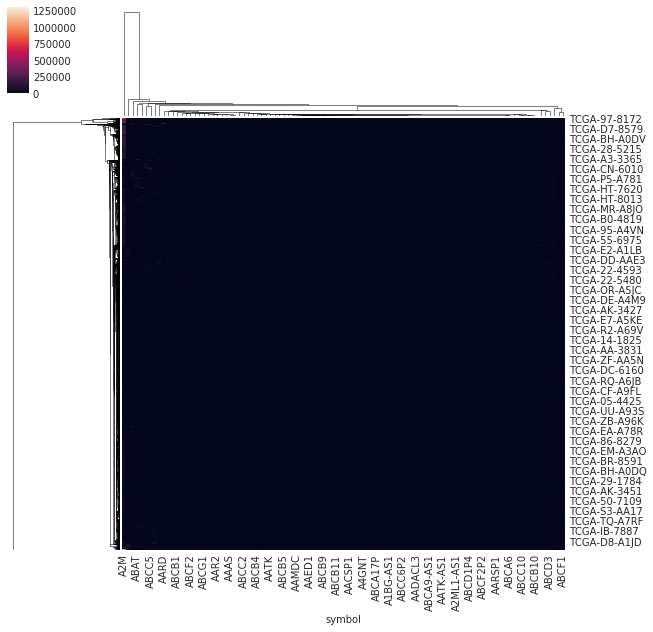

In [19]:
sns.clustermap(df)

In [20]:
df.shape

(9657, 100)

In [16]:
pca = PCA(n_components=10)
pca.fit(df)
pcs = pca.transform(df)

In [17]:
pca_df = pd.DataFrame(pcs)

In [ ]:
pca_df.head()

In [ ]:
plt.figure(figsize=(6,6))
plt.scatter(pca_df.pc1, pca_df.pc2, c=pca_df.color, lw = 0, alpha=0.5, s=20)

In [18]:
model = TSNE(n_components=2, random_state=0)
TSNEs = model.fit_transform(pca_df)

KeyboardInterrupt: 

In [ ]:
tsne_df = pd.DataFrame(TSNEs)
tsne_df.columns = ['tsne1', 'tsne2']
tsne_df['sample'] = df.index

In [ ]:
plt.figure(figsize=(6,6))
plt.scatter(tsne_df.tsne1, tsne_df.tsne2, lw = 0, alpha=0.5, s=20) # c=tsne_df.color,